# Part I -  Fairly Used vehicle Data Set
## by IBRAHIM ALI

## Introduction
> Nigeria is the African country importing the most used vehicles from the United States, and the third in the world, a new       report has shown, The report, by the United Nations Environment Programme (UNEP), said Nigeria ranks just below the United     Arab Emirates (UAE) and Mexico. According to UNEP, 14 million light-duty vehicles (cars, SUVs and minibuses) were exported to   low and middle-income countries between 2015 and 2018.
  “40 per cent of that total ended up in Africa,”.



## Preliminary Wrangling


In [98]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [99]:
def wrangle(file):
    
    # load my dataset
    df = pd.read_csv(file)
    
    # I have figure out some erro during data recording on some states in location column 
    # and there is some odd values that does not belong to Nigeria states, i.e Accra and Mushin
    
    # let replace the mis spelling state name 
    df['location'] = df['location'].replace({'Lagos ':'Lagos',
                                                  'Lagos State':'Lagos',
                                                    'Abuja ':'Abuja',
                                                     'FCT':'Abuja',
                                                     'Arepo ogun state ':'Ogun',
                                                     'Ogun State':'Ogun',
                                                     'Accra':'other',
                                                     'Mushin':'other',
                                                    'Abia State':'Abia'})
    
    
    # let change the year datype to datetime format
    #df['year'] = pd.to_datetime(df['year'])
    
    
    # convert engine, isimported, fuel and transmission into ordered categorical types
    ordinal_var_dict = {'engine': ['8-cylinder(V8)','6-cylinder(V6)','6-cylinder(I6)','5-cylinder(I5)','4-cylinder(H4)','4-cylinder(I4)','3-cylinder(I3)','2-cylinder(I2)'],
                    'isimported': ['Locally used', 'Foreign Used', 'New'],
                    'transmission': ['manual', 'automatic'],
                       'fuel':['petrol', 'diesel']}

    for var in ordinal_var_dict:
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
        df[var] = df[var].astype(ordered_var)
   
    
    return df
    
    

In [100]:
# load my dataset
car_data = wrangle('car_scrape.csv')
car_data.head()

title  odometer location    isimported          engine  \
0         Toyota Corolla     60127    Lagos  Locally used  4-cylinder(I4)   
1              Acura MDX    132908    Lagos  Foreign Used  6-cylinder(V6)   
2           Lexus ES 350    120412    Lagos  Locally used  6-cylinder(V6)   
3  Mercedes-Benz GLK 350     67640    Lagos  Foreign Used  4-cylinder(I4)   
4    Mercedes-Benz E 200     92440    Abuja  Foreign Used  4-cylinder(I4)   

  transmission    fuel   paint    price  year  
0    automatic  petrol  Silver  1995000  2009  
1    automatic  petrol  Whine   3315000  2009  
2    automatic  petrol  Silver  2655000  2008  
3    automatic  petrol   Black  9015000  2013  
4    automatic  petrol   Black  5790000  2013

In [101]:
# let check my data overview
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1451 entries, 0 to 1450
Data columns (total 10 columns):
title           1451 non-null object
odometer        1451 non-null int64
location        1451 non-null object
isimported      1410 non-null category
engine          1450 non-null category
transmission    1451 non-null category
fuel            1451 non-null category
paint           1451 non-null object
price           1451 non-null int64
year            1451 non-null int64
dtypes: category(4), int64(3), object(3)
memory usage: 74.4+ KB


In [102]:
car_data.describe()

odometer         price         year
count  1.451000e+03  1.451000e+03  1451.000000
mean   1.168021e+05  8.431088e+06  2008.594073
std    1.158419e+05  1.308960e+07    39.204292
min    0.000000e+00  4.000000e+05  1217.000000
25%    5.333800e+04  2.615000e+06  2006.000000
50%    9.291900e+04  4.215000e+06  2010.000000
75%    1.527695e+05  8.865000e+06  2014.000000
max    1.775588e+06  1.670150e+08  2626.000000

### What is the structure of your dataset?

> There are 1451 vehicles in the dataset with 10 features (price, year, fuel type, location, paint, odometer, engine type, isimported, title, and transmission type). Most variables are numeric in nature, but the engine, isimported,  and title are cartigorical variables.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features are best for predicting the price of the automobile vehicles in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that title or vehicles model, transmission type, isimported, and engine will have the strongest effect on each vehicles's price.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


Let start with checking the distribution of my dataset

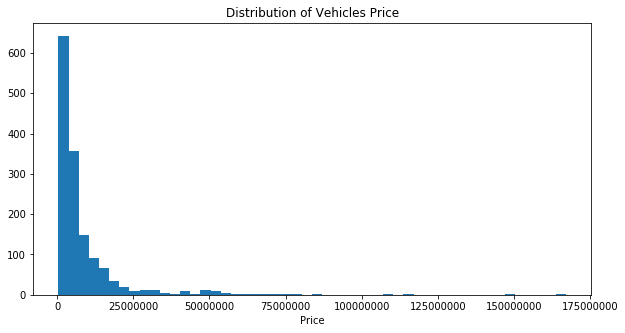

In [103]:
# let check the vehicles price distribuution 
plt.figure(figsize=(10,5))
plt.hist(car_data['price'],bins=50);
plt.xlabel('Price')
plt.title('Distribution of Vehicles Price')
plt.ticklabel_format(style='plain', axis='x');

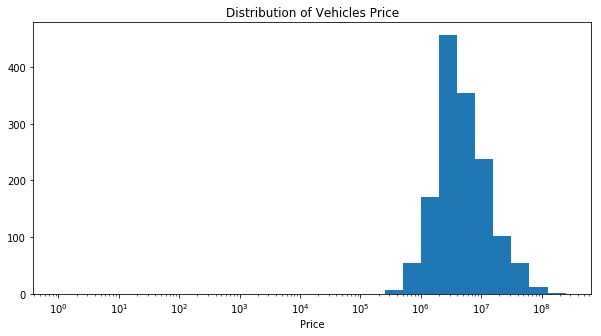

In [104]:
# let put it in log scale
plt.figure(figsize=(10,5))
log_binsize = 0.3
bins = 10 ** np.arange(0, np.log10(car_data['price'].max())+log_binsize, log_binsize)
plt.hist(car_data['price'],bins=bins);
plt.xlabel('Price')
plt.title('Distribution of Vehicles Price')
plt.xscale('log');

The vehicles price has a long tailed distribution, most of the data are clustering around 400000 to 25000000 but there is an outlier on the data, when i put it in log a scale the distribution look  roughly bimodal

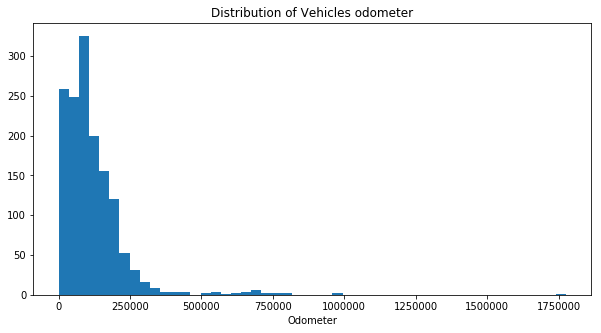

In [105]:
# let check the vehicles odometer distribuution 
plt.figure(figsize=(10,5))
plt.hist(car_data['odometer'],bins=50);
plt.xlabel('Odometer')
plt.title('Distribution of Vehicles odometer');

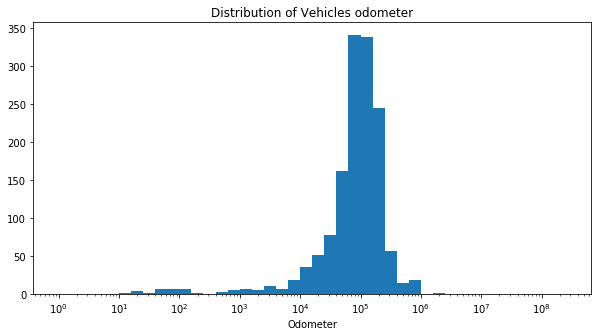

In [106]:
# let check log of the vehicles odometer distribuution 
plt.figure(figsize=(10,5))
log_binsize = 0.2
bins = 10 ** np.arange(0, np.log10(car_data['price'].max())+log_binsize, log_binsize)
plt.hist(car_data['odometer'],bins=bins)
plt.xlabel('Odometer')
plt.title('Distribution of Vehicles odometer')
plt.xscale('log');

The vehicles odometer has a long tailed distribution, most of the data are clustering between 0 to  but 250000 there is an outlier on the data, when i put it in log a scale the distribution look roughly bimodal

In [107]:
# select outliers, and remove them using criteria eyeballed from the plots
car_data = car_data[car_data['price'] <= 12005000]
car_data = car_data[car_data['odometer'] < 900000]

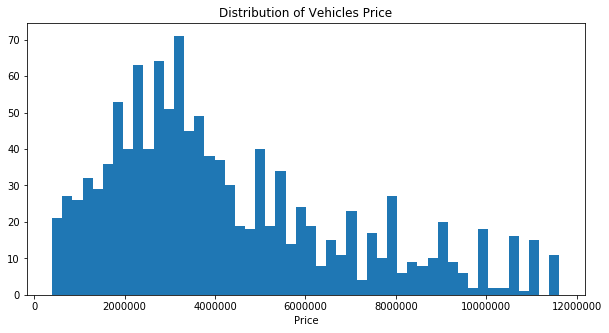

In [108]:
#let re-check the vehicles price distribuution after remove my outlier
plt.figure(figsize=(10,5))
plt.hist(car_data['price'],bins=50);
plt.xlabel('Price')
plt.title('Distribution of Vehicles Price')
plt.ticklabel_format(style='plain', axis='x');

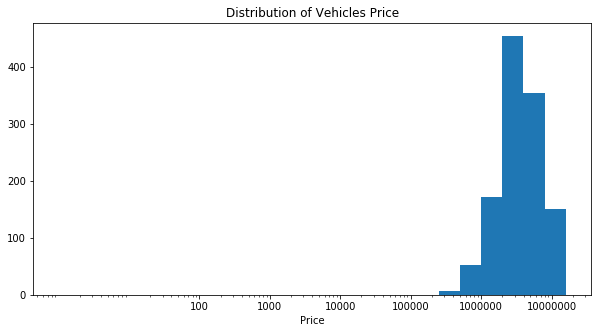

In [109]:
#let re-check the log vehicles price distribuution after remove my outlier
plt.figure(figsize=(10,5))
ticks = [100,1000,10000,100000,1000000,10000000]
labels = ['{}'.format(i) for i in ticks]
log_binsize = 0.3
bins = 10 ** np.arange(0, np.log10(car_data['price'].max())+log_binsize, log_binsize)
plt.hist(car_data['price'],bins=bins);
plt.xlabel('Price')
plt.title('Distribution of Vehicles Price')
plt.xscale('log')
plt.xticks(ticks,labels);

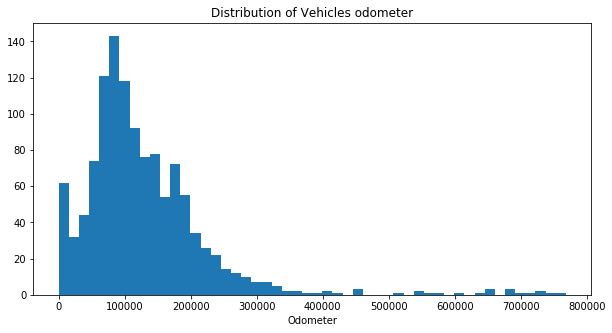

In [110]:
# let re-check the vehicles odometer distribuution 
plt.figure(figsize=(10,5))
plt.hist(car_data['odometer'],bins=50);
plt.xlabel('Odometer')
plt.title('Distribution of Vehicles odometer');

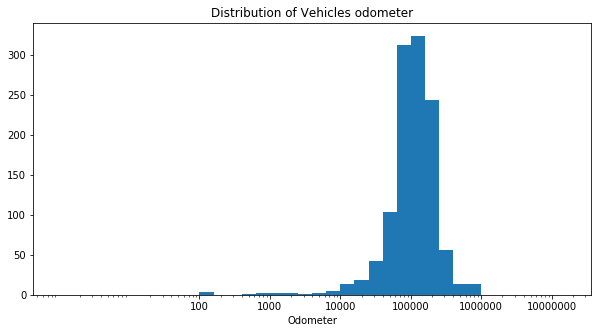

In [111]:
# let re-check log the vehicles odometer distribuution 
plt.figure(figsize=(10,5))
ticks = [100,1000,10000,100000,1000000,10000000]
labels = ['{}'.format(i) for i in ticks]
log_binsize = 0.2
bins = 10 ** np.arange(0, np.log10(car_data['price'].max())+log_binsize, log_binsize)
plt.hist(car_data['odometer'],bins=bins)
plt.xlabel('Odometer')
plt.title('Distribution of Vehicles odometer')
plt.xscale('log')
plt.xticks(ticks,labels);

I will used countplot to check somehidden insight on my data 

Most of the fairly vehiclle used in Nigeria are foreign Used, the dataset contain only fairly used vehicles record, there is missing record of New vehicles 

In [112]:
# let used function to plot my count graph
def my_countplot(df,xvar,huevar=None,color=None,palette=None,order=None):
    # set plot
    plt.figure(figsize=[8,5])
    sb.countplot(data=df, x=xvar,color=color,order=order,palette=palette)
    
    xvar = xvar.replace("_"," ")
    if huevar:
        huevar = huevar.replace("_"," ")
    
    plt.title(f'''Graph of Most Common vehicles {xvar} Type in Nigeria '''.title(), fontsize=14, weight='bold')
    
    plt.xlabel(xvar.title(), fontsize=14,weight='bold')
    
    plt.ylabel('Frequency'.title(),fontsize=10,weight='bold')
    

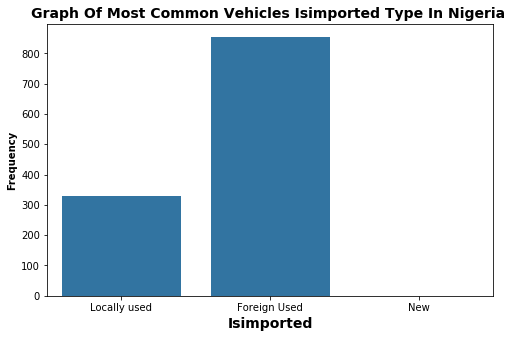

In [113]:
color = sb.color_palette()[0]
my_countplot(car_data, 'isimported', color=color)

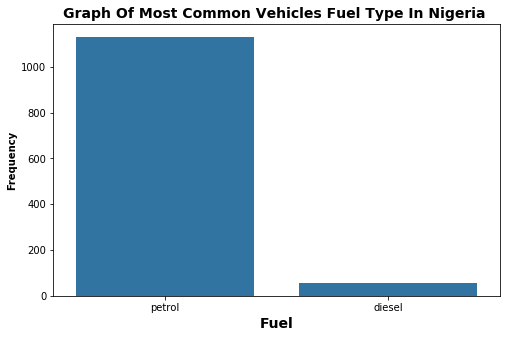

In [114]:
# countplot to check most common vehicle fuel type in nigeria
color = sb.color_palette()[0]
my_countplot(car_data, 'fuel', color=color)

Most of the vehicles fuel type used in Nigeria is petrol

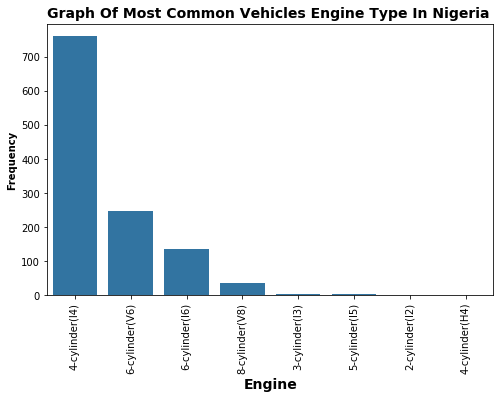

In [52]:
# countplot to check most common vehicle Cylinder type in nigeria
color = sb.color_palette()[0]
order = car_data['engine'].value_counts().index
my_countplot(car_data, 'engine', color=color, order=order)
plt.xticks(rotation = 90);

Most of the fairly used car engine in Nigeria have 4 Cylinders 

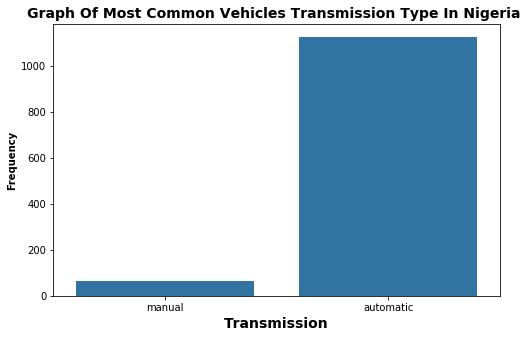

In [49]:
# countplot to check most common vehicle Transmission type in nigeria
color = sb.color_palette()[0]
my_countplot(car_data, 'transmission', color=color)

Majority of Vehicles transmission type in Nigeria is automatic 



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Both Price annd odometer variable has a long tailed distribution and most of the price variable are clustering around 400000 to 25000000 but when i put it in a log scale the distribution look roughly bimodal and also i noticed that  there is an outlier in my dataset

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I have noticed that there is an outlier in my dataset which i removed them for safety purpose.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

I will start by checking the Relationship between Price and odometer

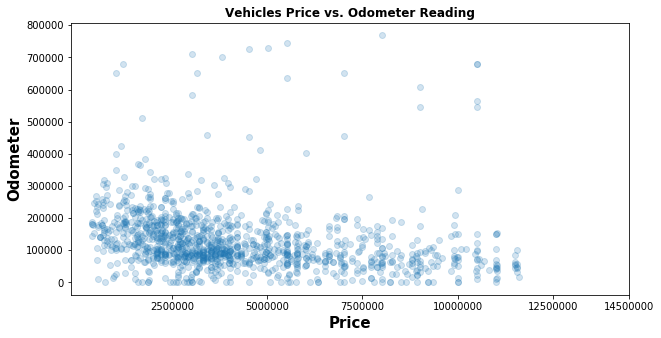

In [84]:
plt.figure(figsize=(10,5))
ticks = [2500000,5000000,7500000,10000000,12500000,14500000]
labels = ['{}'.format(i) for i in ticks]
plt.scatter(data=car_data, x = 'price', y ='odometer', alpha=2/10)
plt.xlabel('Price',fontsize=15,weight='bold')
plt.ylabel('Odometer',fontsize=15,weight='bold')
plt.xticks(ticks, labels)
plt.title('Vehicles Price vs. Odometer Reading',weight='bold');

Based on this graph it show that motor vehicle with high odometer or milige has a lower price while the one with low odometer expected to have higher price

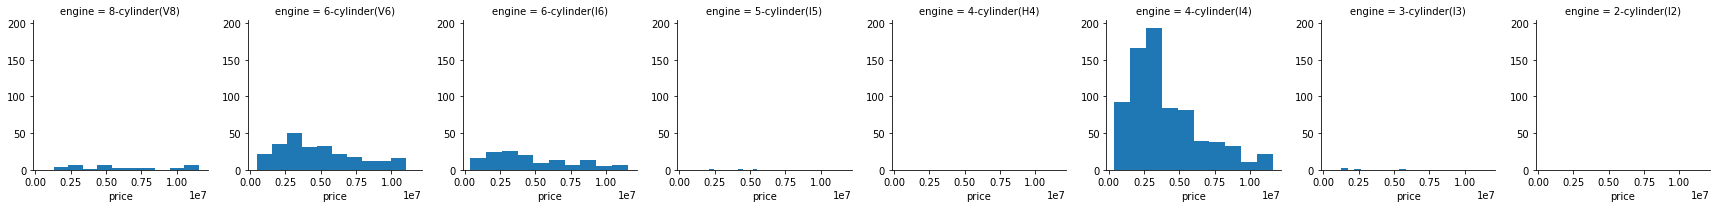

In [20]:
# Plot the Seaborn's FacetGrid
plt.figure(figsize = [10, 5])
g = sb.FacetGrid(data = car_data, col = 'engine')
g.map(plt.hist, "price");

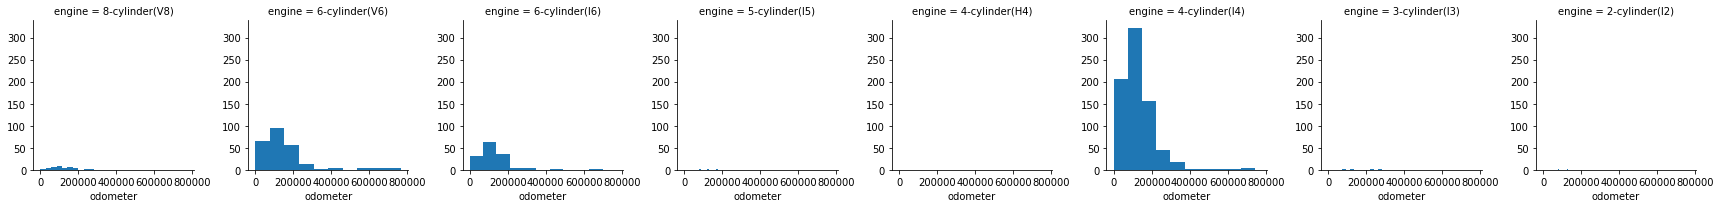

In [21]:
plt.figure(figsize = [10, 5])
plt.figure(figsize = [10, 5])
g = sb.FacetGrid(data = car_data, col = 'engine')
g.map(plt.hist, "odometer");

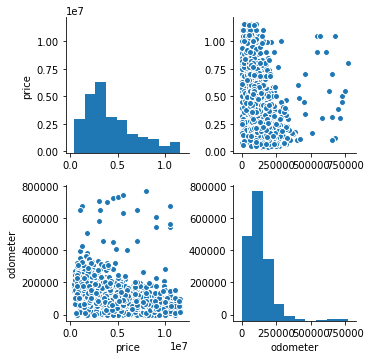

In [22]:
g = sb.pairplot(data=car_data, vars=['price','odometer'])

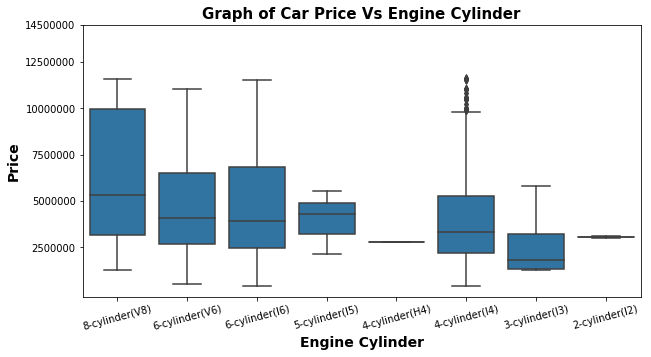

In [83]:
# plot of numeric features against categorical features.
plt.figure(figsize = [10, 5])
ticks = [2500000,5000000,7500000,10000000,12500000,14500000]
labels = ['{}'.format(i) for i in ticks]
base_color = sb.color_palette()[0]
sb.boxplot(data=car_data, x='engine', y='price', color=base_color)
plt.xticks(rotation=15)
plt.xlabel('Engine Cylinder', fontsize=14,weight='bold')
plt.ylabel("Price",fontsize=14,weight='bold')
plt.title('Graph of Car Price Vs Engine Cylinder', fontsize=15,weight='bold')
plt.yticks(ticks, labels);

As i expected there is positive relationship between price and engine cylinder, most of the vehicle that used higher number of engine cylinder used diesel as fuel which i expected to be more expensive than the one that used petrol as a fuel. But i will confirm this later in my analysis 

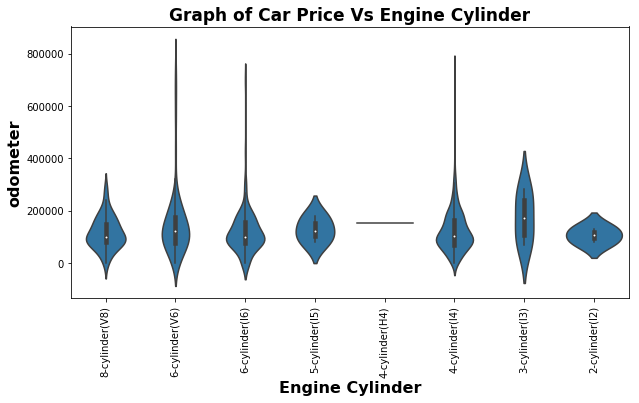

In [79]:
# plot of numeric features against categorical features.
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]
sb.violinplot(data = car_data, x = 'engine', y = 'odometer',
                  color = base_color)
plt.xticks(rotation = 90)
plt.xlabel('Engine Cylinder', fontsize=16,weight='bold')
plt.ylabel("odometer",fontsize=16,weight='bold')
plt.title('Graph of Car Price Vs Engine Cylinder', fontsize=17,weight='bold');

Based on this graph, it show that motor vehicle with higher engine cylinder tend to have higher selling price

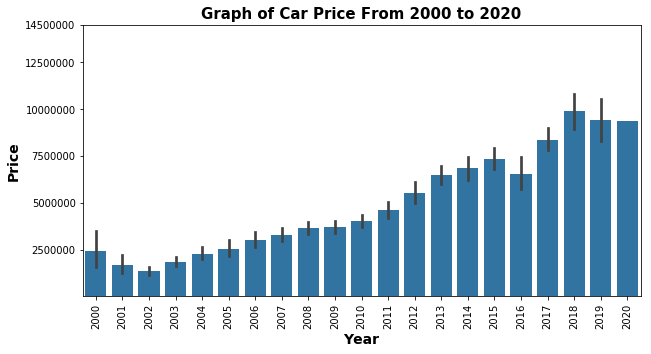

In [74]:
#let check the nature of car price from 2000 to 2020
sub_car = car_data[car_data['year'] >=2000]
plt.figure(figsize=(10,5))
ticks = [2500000,5000000,7500000,10000000,12500000,14500000]
labels = ['{}'.format(i) for i in ticks]
base = sb.color_palette()[0]
sb.barplot(x='year',y='price',data=sub_car, color = base)
plt.xticks(rotation=90)
plt.xlabel('Year', fontsize=14,weight='bold')
plt.ylabel("Price",fontsize=14,weight='bold')
plt.title('Graph of Car Price From 2000 to 2020', fontsize=15,weight='bold')
plt.yticks(ticks,labels);


In [71]:
# let query the Year and total 
trend=car_data[['year','price']]

# select only data record from 2000 t0 2020
trend = trend[trend['year'] >=2000]

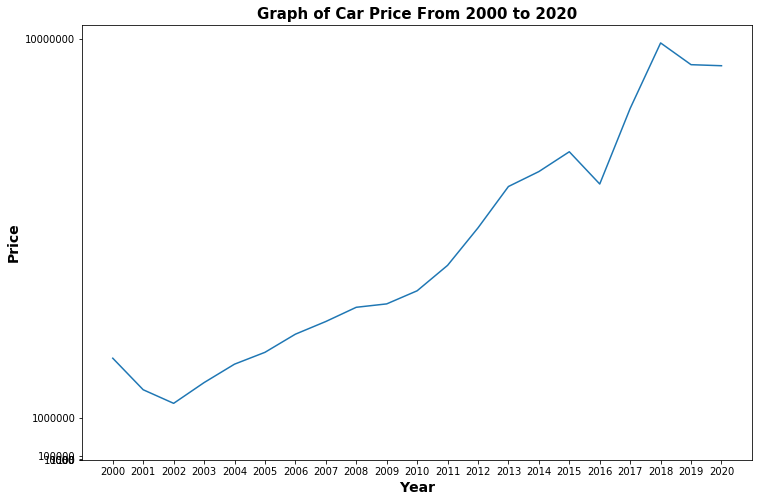

In [72]:
#let check the nature of car price from 2000 to 2020
plt.figure(figsize=(12,8))
plot_1 = trend.groupby(["year"]).price.agg("mean")
plot_1.plot(figsize=(12,8))
plt.xticks(np.arange(2000,2021))
plt.xlabel('Year', fontsize=14,weight='bold')
plt.ylabel("Price",fontsize=14,weight='bold')
plt.title('Graph of Car Price From 2000 to 2020', fontsize=15,weight='bold')
plt.yticks(ticks,labels);

This Graph show an increase in price with Year, mean there is positive relationship between price and Year

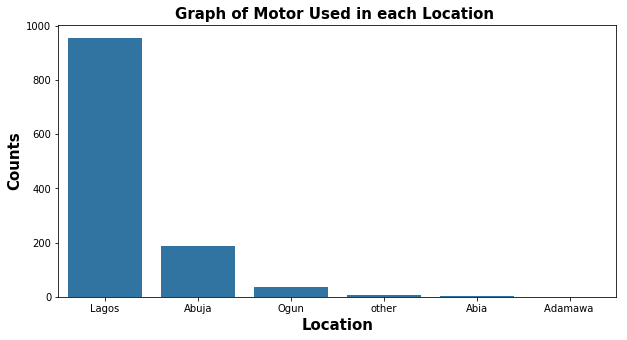

In [66]:
# let check the number of cars each state 
plt.figure(figsize=(10,5))
base = sb.color_palette()[0]
order = car_data['location'].value_counts().index
ax = sb.countplot(data = car_data, x = 'location',color = base,order=order)
ax.legend(loc = 1, framealpha = 1)
plt.xlabel('Location',fontsize=15,weight='bold')
plt.ylabel('Counts',fontsize=15,weight='bold')
plt.title('Graph of Motor Used in each Location ',fontsize=15,weight='bold'); 

Lagos state has highest number of motor vehicle in Nigeria

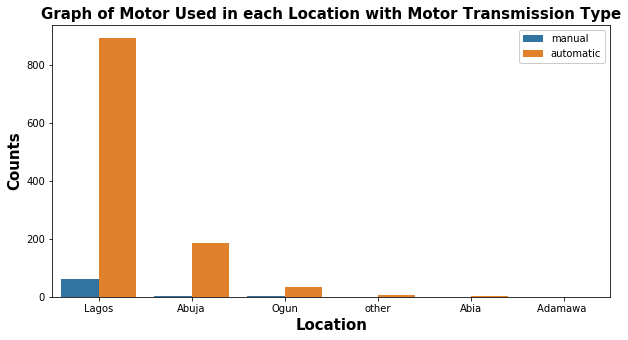

In [67]:
# let check the number of automatic car in each location
plt.figure(figsize=(10,5))
order = car_data['location'].value_counts().index
ax = sb.countplot(data = car_data, x = 'location', hue = 'transmission', order=order)
ax.legend(loc = 1, framealpha = 1)
plt.xlabel('Location',fontsize=15,weight='bold')
plt.ylabel('Counts',fontsize=15,weight='bold')
plt.title('Graph of Motor Used in each Location with Motor Transmission Type',fontsize=15,weight='bold'); 

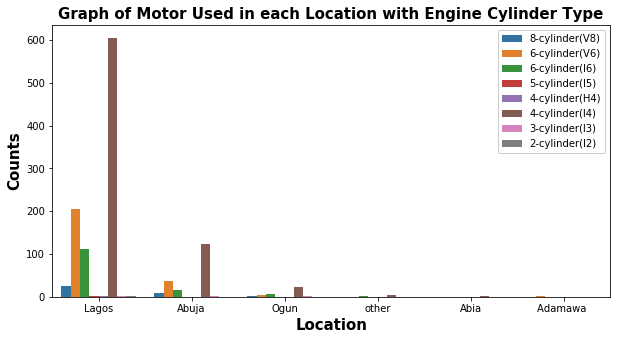

In [68]:
# let ccheck the number of vehicle engine cylinder in each location
plt.figure(figsize=(10,5))
order = car_data['location'].value_counts().index
ax = sb.countplot(data = car_data, x = 'location', hue = 'engine', order=order)
ax.legend(loc = 1, framealpha = 1)
plt.xlabel('Location',fontsize=15,weight='bold')
plt.ylabel('Counts',fontsize=15,weight='bold')
plt.title('Graph of Motor Used in each Location with Engine Cylinder Type',fontsize=15,weight='bold'); 

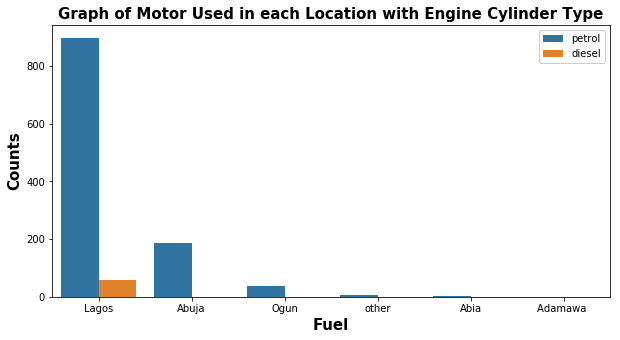

In [69]:
# let ccheck the number of vehicle engine cylinder in each location
plt.figure(figsize=(10,5))
order = car_data['location'].value_counts().index
ax = sb.countplot(data = car_data, x = 'location', hue = 'fuel', order=order)
ax.legend(loc = 1, framealpha = 1)
plt.xlabel('Fuel',fontsize=15,weight='bold')
plt.ylabel('Counts',fontsize=15,weight='bold')
plt.title('Graph of Motor Used in each Location with Engine Cylinder Type',fontsize=15,weight='bold'); 

Most of the motor vehicles operate in Nigeria are automatic with 4 cylinders engine. All the vehicle that used diesel as fuel type are operated in lagos state, because lagos is the biggest commercial state in Nigeria

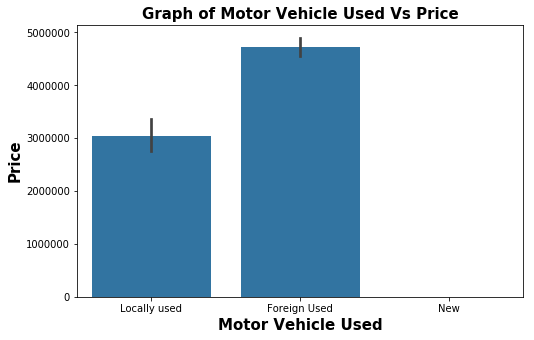

In [91]:
plt.figure(figsize=(8,5))
base = sb.color_palette()[0]
sb.barplot(data=car_data, x='isimported', y='price',color=base)
plt.xlabel('Motor Vehicle Used',fontsize=15,weight='bold')
plt.ylabel('Price',fontsize=15,weight='bold')
plt.title('Graph of Motor Vehicle Used Vs Price',fontsize=15,weight='bold'); 

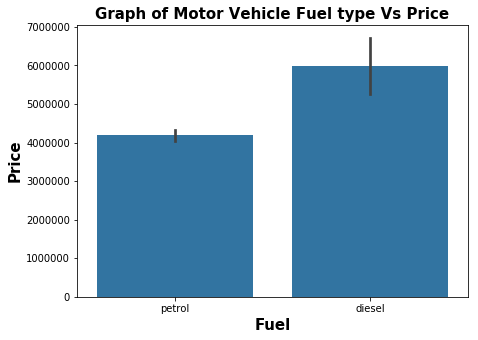

In [92]:
plt.figure(figsize=(7,5))
base = sb.color_palette()[0]
sb.barplot(data=car_data, x='fuel', y='price',color=base)
plt.xlabel('Fuel',fontsize=15,weight='bold')
plt.ylabel('Price',fontsize=15,weight='bold')
plt.title('Graph of Motor Vehicle Fuel type Vs Price',fontsize=15,weight='bold'); 

Most of the vehicle that used diesel fuel are expensive

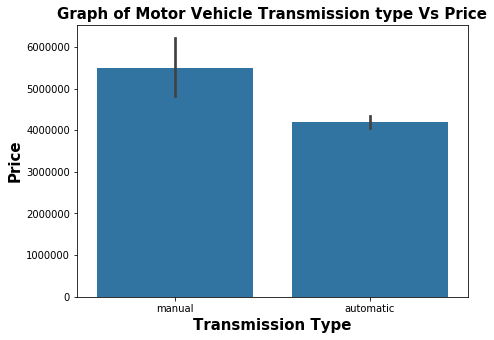

In [94]:
plt.figure(figsize=(7,5))
base = sb.color_palette()[0]
sb.barplot(data=car_data, x='transmission', y='price',color=base)
plt.xlabel('Transmission Type',fontsize=15,weight='bold')
plt.ylabel('Price',fontsize=15,weight='bold')
plt.title('Graph of Motor Vehicle Transmission type Vs Price',fontsize=15,weight='bold'); 

Manual motor vehicle has higher price than automatic vehicle, let confirm this report

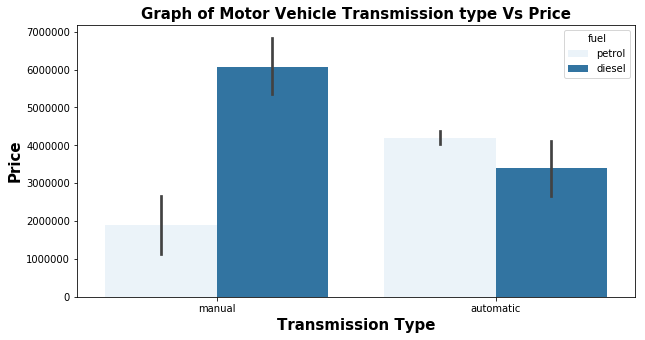

In [95]:
plt.figure(figsize=(10,5))
base = sb.color_palette()[0]
sb.barplot(data=car_data, x='transmission', y='price',color=base,hue='fuel')
plt.xlabel('Transmission Type',fontsize=15,weight='bold')
plt.ylabel('Price',fontsize=15,weight='bold')
plt.title('Graph of Motor Vehicle Transmission type Vs Price',fontsize=15,weight='bold'); 

Based of my dataset show that Most of the vehicle that used diesel as a fuel type are manual, and vehicle that used diesel fuel type are expensive, mostly the are used for commercial purpose

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There is negetive correlationship between price and odometer, the price of motor vehicle decrease with an increase in odometer value and vice versa. Based on my dataset it show a positive relationship between my variable of interest price and  othe categorical variable such as Engine cylinder, isimported, car transmission type, fuel type and so on. All this variable  are siginificantly effect the motor vehicle priice 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is positive relationship between odometer and number of engine cylinder, and lagos state has the highest number of commercial vehicle in nigeria (motor vehicle that used diesel as a fuel type)

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

The main thing I want to explore in this part of the analysis is how the three categorical measures of quality play into the relationship between price and transmission type.

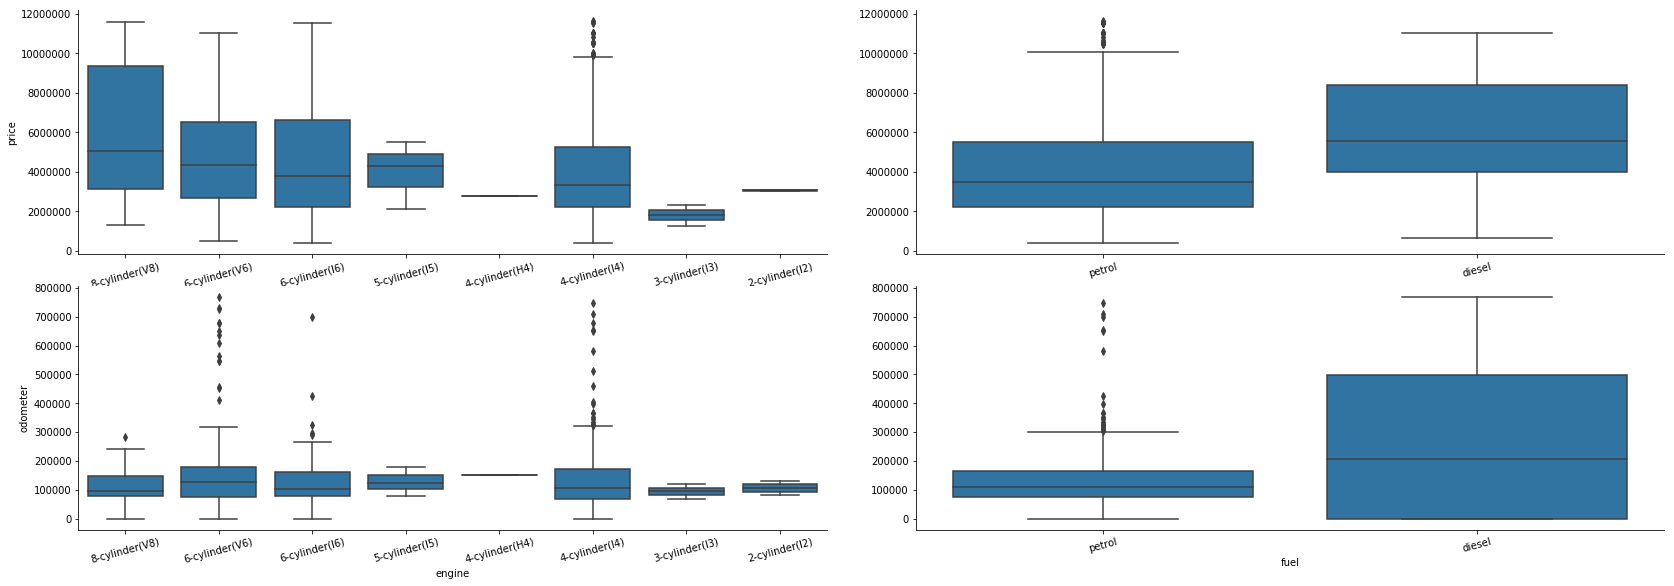

In [56]:
# plot matrix of numeric features against categorical features.
samples = np.random.choice(car_data.shape[0], 1000, replace = False)
car_data_samp = car_data.iloc[samples,:]

def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color = default_color)
    plt.xticks(rotation=15)
    plt.ticklabel_format(style='plain', axis='y');

g = sb.PairGrid(data = car_data_samp, y_vars = ['price', 'odometer'], x_vars = ['engine','fuel'],

                size = 4, aspect = 1.4)
g.fig.set_size_inches(24,8);
g.map(boxgrid)
plt.show();

As i expected there is a good relationship between vehicle engine cylinder and motor vehicle price, most of the vehicle that used diesel as a fuel type are more expensive than the one used petrol fuel type. Diesel vehicle tend to have higher odometer since most of them are commercial vehicles

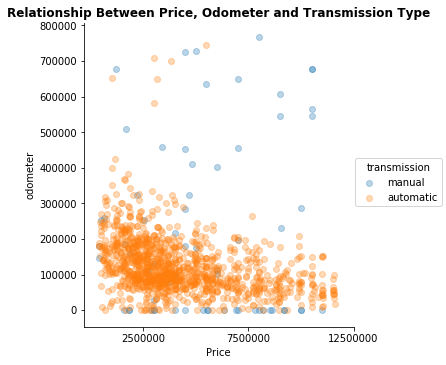

In [61]:
# let check the relationship between price ,odometer and some categorical varriable
g = sb.FacetGrid(data = car_data, hue = 'transmission', size = 5)
g.map(plt.scatter, 'price','odometer', alpha=3/10)
plt.xticks([0.25e7,  0.75e7, 1.25e7], [2500000,7500000,12500000])
g.add_legend()
plt.xlabel('Price')
plt.ylabel('odometer')
plt.title('Relationship Between Price, Odometer and Transmission Type',weight='bold');

Most of the vehicles are automatic, and the price of the vehicle has a negative relationship with odometer, and most of the manual vehicle have higher odometer compare to automatic vehicles

In [57]:
# use a samle of 1000 data from fuel_econ dataset
np.random.seed(2018)
sample = np.random.choice(car_data.shape[0],1000,replace=False)
car_data_subset = car_data.iloc[sample].reset_index()

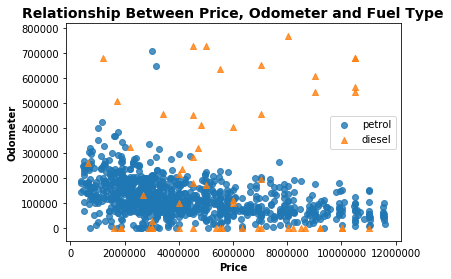

In [96]:
markers = [['petrol', 'o'],
              ['diesel','^']]
for i, marker in markers:
    plot_data = car_data_subset[car_data_subset['fuel']==i]
    sb.regplot(data=plot_data, x='price', y = 'odometer', x_jitter=0.05, fit_reg=False,marker=marker)
plt.legend(['petrol', 'diesel'])
plt.ticklabel_format(style='plain', axis='x')
plt.title('Relationship Between Price, Odometer and Fuel Type', fontsize=14, weight='bold')
plt.xlabel('Price',weight='bold')
plt.ylabel('Odometer',weight='bold');

Most of the vehicles in Nigeria using petrol as a fuel type, while those that using diesel fuel type have tend to have higher odometer and are expensive.

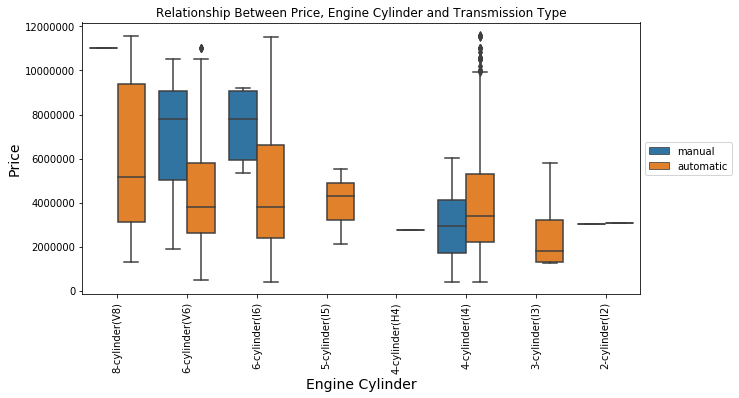

In [62]:
plt.figure(figsize=(10,5))
sb.boxplot(data = car_data, x = 'engine', y = 'price', hue = 'transmission')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) 
plt.xticks(rotation = 90)
plt.ticklabel_format(style='plain', axis='y');
plt.ylabel('Price',fontsize=14)
plt.xlabel('Engine Cylinder',fontsize=14)
plt.title('Relationship Between Price, Engine Cylinder and Transmission Type');

Very interesting this graph show a good relationship between vehicle price and number of engine cylinders

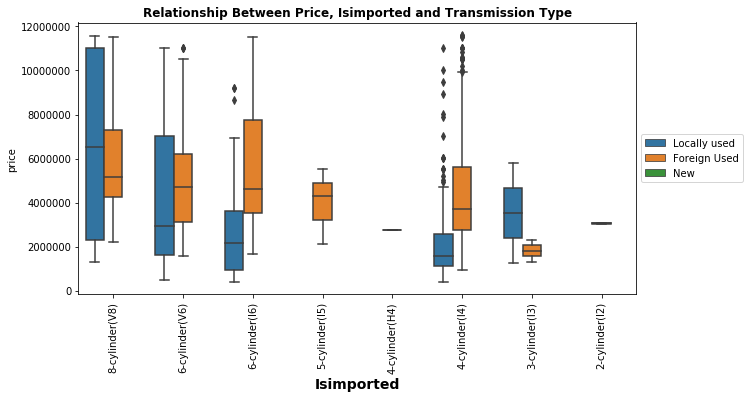

In [97]:
plt.figure(figsize=(10,5))
sb.boxplot(data = car_data, x = 'engine', y = 'price', hue = 'isimported')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) 
plt.xticks(rotation = 90)
plt.ticklabel_format(style='plain', axis='y');
plt.xlabel('Isimported',fontsize=14,weight='bold')
plt.title('Relationship Between Price, Isimported and Transmission Type',weight='bold');

In [ ]:
g =sb.FacetGrid(data=car_data, hue='engine',
                 size=4, aspect=1.5,palette='viridis_r')
g.map(sb.regplot,'price','odometer',x_jitter=0.04, fit_reg=False)
g.add_legend()
plt.ticklabel_format(style='plain', axis='x');

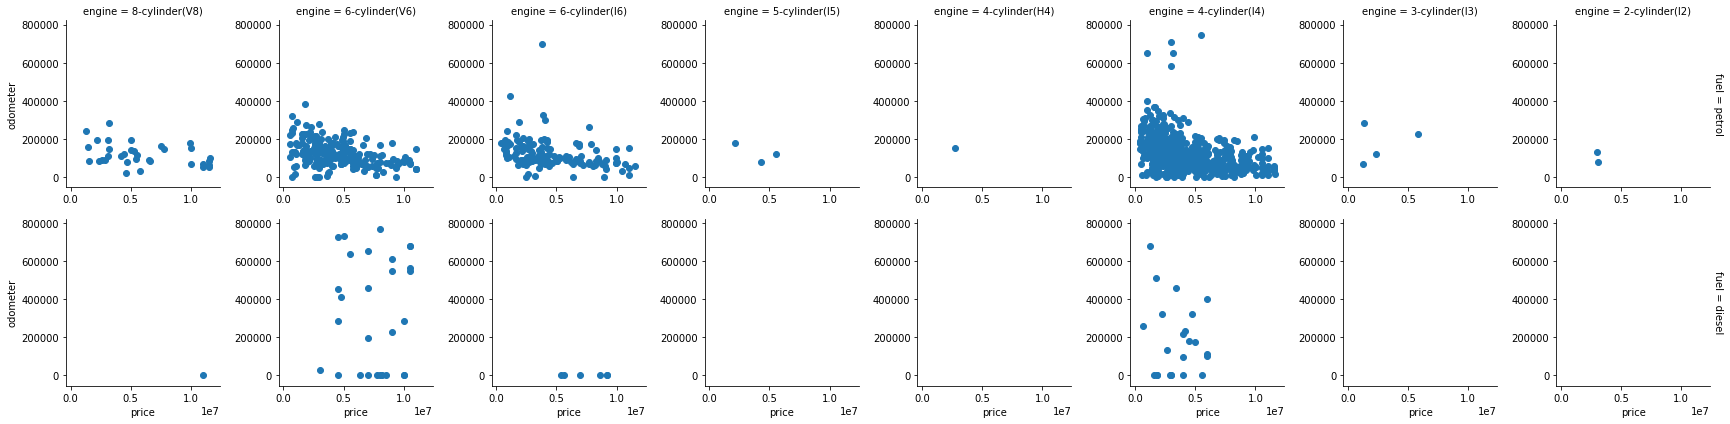

In [84]:
plt.figure(figsize=(18,6))
g = sb.FacetGrid(data=car_data, col='engine', row='fuel', margin_titles=True)
g.map(plt.scatter,'price','odometer');

As i expected most of the engine cylinder are using petrol as a fuel type, and there is negative correlation between vehicle price and odometer. Vehicle price that used diesel as a fuel does not have strong relationship with odometer

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I extended my investigation of variable that affect vehicles price in Nigeria, in this section by looking at the impact of the four categorical features. The multivariate exploration here showed that there indeed a positive relationship between price and engine cylinder, fuel type,imported or locally used car, and vehicle transmission type, but my dataset show that Vehicle price that used diesel as a fuel does not have strong relationship with odometer

### Were there any interesting or surprising interactions between features?

> 

## Conclusions
> My final conclusions regarding this vehicle dataset, the price of a motor vehicle in Nigeria has a good relationship with vehicle engine cylinder, fuel type, transmission type, and foriegn or locally used vehicle. The price of a vehicles has a negative correlation with vehicles odometer, that is vehicle with higher odometer tend to be less expensive than the one with lower odometer. Most of the price of commercial vehicle that used diesel as a fuel type have a poor correlation with odometer.